In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
import tensorflow as tf
import warnings

warnings.filterwarnings("ignore")

In [13]:
from keras.datasets import boston_housing

(X_train,y_train),(X_test,y_test)=boston_housing.load_data()


X_train.shape, X_test.shape

((404, 13), (102, 13))

In [14]:
X_train[:1]

array([[  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
         91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
         18.72   ]])

In [15]:
mean=X_train.mean(axis=0)
std=X_train.std(axis=0)

X_train-=mean
X_train/=std

X_test-=mean
X_test/=std

X_train.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [16]:
model=Sequential()

model.add(Dense(32,activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dense(16,activation='relu'))
model.add(Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                448       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 993 (3.88 KB)
Trainable params: 993 (3.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])


In [18]:
history=model.fit(X_train,y_train,
                  epochs=50,
                  validation_data=(X_test,y_test))

Epoch 1/50


13/13 [==============================] - 1s 18ms/step - loss: 585.4342 - mae: 22.3002 - val_loss: 605.9517 - val_mae: 22.7608
Epoch 2/50
13/13 [==============================] - 0s 4ms/step - loss: 566.7142 - mae: 21.8704 - val_loss: 585.2189 - val_mae: 22.2974
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 545.3383 - mae: 21.3805 - val_loss: 560.8560 - val_mae: 21.7487
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 519.8189 - mae: 20.7853 - val_loss: 530.6164 - val_mae: 21.0540
Epoch 5/50
13/13 [==============================] - 0s 4ms/step - loss: 488.0527 - mae: 20.0102 - val_loss: 492.1465 - val_mae: 20.1550
Epoch 6/50
13/13 [==============================] - 0s 4ms/step - loss: 447.7075 - mae: 19.0230 - val_loss: 445.7212 - val_mae: 19.0096
Epoch 7/50
13/13 [==============================] - 0s 4ms/step - loss: 399.5614 - mae: 17.7784 - val_loss: 389.6229 - val_mae: 17.5846
Epoch 8/50
13/13 [==============================] - 0s 5ms

In [19]:
history.history #тут будет изменение каждой метрики в зависимости от эпохи

{'loss': [585.4342041015625,
  566.7142333984375,
  545.3383178710938,
  519.8189086914062,
  488.0527038574219,
  447.70751953125,
  399.5614318847656,
  343.19940185546875,
  280.9162902832031,
  218.97425842285156,
  161.8931427001953,
  116.36079406738281,
  86.0640640258789,
  68.54597473144531,
  56.730037689208984,
  48.3976936340332,
  42.047542572021484,
  36.888450622558594,
  32.97829818725586,
  30.063701629638672,
  27.97428321838379,
  26.328195571899414,
  25.081037521362305,
  24.09001350402832,
  23.30878257751465,
  22.555435180664062,
  21.95564842224121,
  21.41292381286621,
  20.895002365112305,
  20.395967483520508,
  19.962125778198242,
  19.474943161010742,
  19.12677574157715,
  18.662275314331055,
  18.22461700439453,
  17.86768341064453,
  17.497371673583984,
  17.151081085205078,
  16.780410766601562,
  16.45630645751953,
  16.13593101501465,
  15.828310012817383,
  15.472959518432617,
  15.200895309448242,
  14.94215202331543,
  14.678511619567871,
  14.478

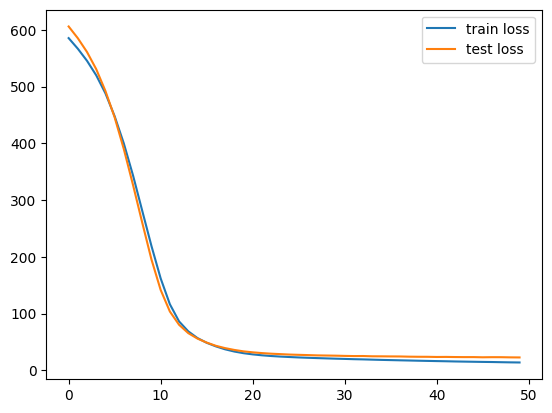

In [20]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='test loss')
plt.legend();


callback - определенная функция, применяемая в определенные моменты во время процедуры обучения. Вы можете использовать функции callback чтобы 
получить информация о внутреннем состоянии модели во время обучения.
Нужно передовать callback'и методу fit. И подходящие методы callback
будут вызваны на каждой стадии обучения. Примеры основных колбэков ниже

1. ModelCheckPoint

Сохранение модели после каждой эпохи, так как нейросети обучаются очень долго и промежуточные результаты нужно сохранять

In [21]:
from keras import callbacks

model_checkpoint = callbacks.ModelCheckpoint(filepath='model_best_{epoch}.h5', #путь куда сохраняется наша модель, Где мы допом указываем номер эпохи
                                             monitor='val_loss', #что нужно мониторить
                                             varbose=1,#тут короче 1 - с информационными плашечками, 0 - без них
                                             save_best_only=True, #сохраняет только если улучшилась отслеживаемая метрика
                                             save_weights_only=False, #сохранять только веса или всю модель
                                             mode='auto',
                                             save_freq='epoch' )#как часто мы сохраняем модель(здесь каждую эпоху)

In [23]:
model.compile(optimizer='adam',loss='mae',metrics=['mae'])

model.fit(X_train,y_train,
          epochs=5,
          validation_data=(X_test,y_test),
          callbacks=[model_checkpoint])

Epoch 1/5
13/13 [==============================] - 1s 20ms/step - loss: 2.4289 - mae: 2.4289 - val_loss: 3.2723 - val_mae: 3.2723
Epoch 2/5
13/13 [==============================] - 0s 7ms/step - loss: 2.3923 - mae: 2.3923 - val_loss: 3.2686 - val_mae: 3.2686
Epoch 3/5
13/13 [==============================] - 0s 6ms/step - loss: 2.3761 - mae: 2.3761 - val_loss: 3.1983 - val_mae: 3.1983
Epoch 4/5
13/13 [==============================] - 0s 5ms/step - loss: 2.3528 - mae: 2.3528 - val_loss: 3.1714 - val_mae: 3.1714
Epoch 5/5
13/13 [==============================] - 0s 4ms/step - loss: 2.3323 - mae: 2.3323 - val_loss: 3.2120 - val_mae: 3.2120


2. EarlyStopping

Прекращение обучения когда параметр monitor перестает улучшаться

In [26]:
early_stop=callbacks.EarlyStopping(monitor='val_loss', #то что мы мониторим
                                   min_delta=0, # если разница в улучшении меньше указаного то улучшение не засчитано
                                   patience=3, #число эпох в которых улучшение не происходило  и наша модель остановится после этого количества эпох
                                   verbose=1, #отображение 1 или 0
                                   mode='auto',                              
                                   #baseline=0.06, # значение которое должна достичь monitor, Обучение прекратиться если модель не достигла ее
                                   restore_best_weights=False) #если true То можем восстановить самые лучше веса за все эпохи

In [27]:
model.fit(X_train,y_train,
          epochs=10,validation_data=(X_test,y_test),
          callbacks=[early_stop])
#Запусти несколько раз

Epoch 1/10
13/13 [==============================] - 0s 8ms/step - loss: 2.1794 - mae: 2.1794 - val_loss: 2.9778 - val_mae: 2.9778
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 2.1632 - mae: 2.1632 - val_loss: 3.0805 - val_mae: 3.0805
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 2.1531 - mae: 2.1531 - val_loss: 3.0243 - val_mae: 3.0243
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 2.1442 - mae: 2.1442 - val_loss: 3.0533 - val_mae: 3.0533
Epoch 4: early stopping


3.ReduceLROnPlateau

Уменьшение скорости обучения когда метрика перестала улучшаться

Модели зачастую работают лучше если уменьшать скорость обучения,этот колбэк следит за параметром monitor и если не происходит улучшения за patience эпох то уменьшает скорость обучения

In [32]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])


reduce_lr=callbacks.ReduceLROnPlateau(monitor='val_mae',
                                      factor=0.1,#во скоьлко раз уменьшать скорость обучения
                                      patience=0,
                                      verbose=1,
                                      mode='auto',
                                      min_delta=0, #минимальное изменение которое должно быть
                                      cooldown=0, #сколько эпох нам нужно подождать чтобы снова проверить нужно ли уменьшать скорость обучения
                                      min_lr=1e-10)#минимальная скорость обучения


model.fit(X_train,y_train,epochs=10,
          validation_data=(X_test,y_test),
                           callbacks=[reduce_lr])

#тут в целом легко - смотрим на val-mae и если не изменяется то замедляем скорость обучения

Epoch 1/10
13/13 [==============================] - 1s 14ms/step - loss: 9.7713 - mae: 2.1662 - val_loss: 21.0863 - val_mae: 3.0095 - lr: 0.0010
Epoch 2/10
 1/13 [=>............................] - ETA: 0s - loss: 4.5290 - mae: 1.6596
Epoch 2: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
13/13 [==============================] - 0s 5ms/step - loss: 9.3833 - mae: 2.1423 - val_loss: 21.4953 - val_mae: 3.0507 - lr: 0.0010
Epoch 3/10
 1/13 [=>............................] - ETA: 0s - loss: 21.1426 - mae: 2.3900
Epoch 3: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
13/13 [==============================] - 0s 5ms/step - loss: 9.2268 - mae: 2.1202 - val_loss: 21.4921 - val_mae: 3.0539 - lr: 1.0000e-04
Epoch 4/10
 1/13 [=>............................] - ETA: 0s - loss: 6.6826 - mae: 2.1245
Epoch 4: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
13/13 [==============================] - 0s 5ms/step - loss: 9.2173 - mae: 2.1177 - va